## Procesamiento Digital de Imágenes - Fourier


In [93]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
%matplotlib inline
import math

In [94]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

# Transformada Discreta de Fourier 

Se va calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. 

Se va mostrar el módulo en escala logarítmica

Transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible


/var/folders/fj/nwtsnzk57_j5l_26n6c3kk_w0000gn/T/ipykernel_2016/3655894702.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  Img_gray = imageio.imread('../Proy_RaicesMatriciales/tp4.png')/255


filas 512


Text(0.5, 1.0, 'log_center_mag')

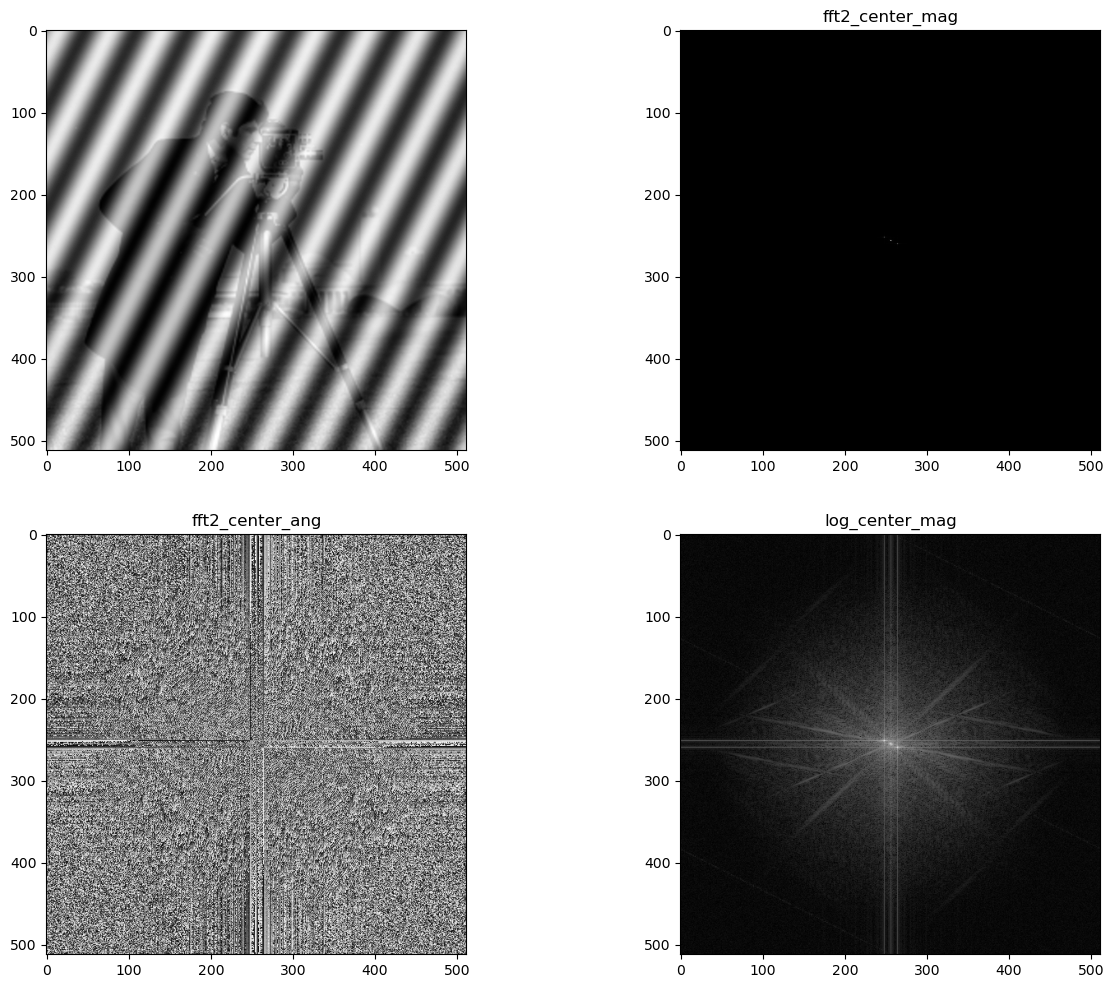

In [95]:
Img_gray = imageio.imread('../Proy_RaicesMatriciales/tp4.png')/255
filas, columnas = Img_gray.shape
print('filas',filas)
#Tf2D=np.fft.fft2(Imag)   Transformada de fourier en 2D
fft2 = np.fft.fft2(Img_gray)
#Tf2DCent=np.fft.fftshift(Tf)  Mover las bajas frecuencias al centro
fft2_center = np.fft.fftshift(fft2)
#Funcion Abs= np.abs() Calcula magnitud de un arreglo en espacio complejo
fft2_center_mag = np.abs(fft2_center)
#fft2_center_mag=np.uint8(fft2_center_mag)
#Funcion Angulo= np.ang() Calcula el angulo  de un arreglo espacio complejo
fft2_center_ang = np.angle(fft2_center)
#fft2_center_ang=np.uint8(fft2_center_ang)
#20*np.log10(Funcion Magnitud) Espectro en escala logaritmica
log_center_mag = 20*np.log(fft2_center_mag+1)
_, axes = plt.subplots(2, 2, figsize=(15,12))
axes[0,0].imshow(Img_gray,'gray')
axes[0,1].imshow(fft2_center_mag,'gray')
axes[0,1].set_title('fft2_center_mag')
axes[1,0].imshow(fft2_center_ang,'gray')
axes[1,0].set_title('fft2_center_ang')
axes[1,1].imshow(log_center_mag,'gray')
axes[1,1].set_title('log_center_mag')

## Aplicando Correccion manual sobre imagenes capturadas
Se llama a una Libreria para corregir la imagane  , el cual donde exista color blanco en exceso se anula [0] , color negro

In [96]:
from matplotlib import cm  ## se llama a libreria para guardar imagen en gris
plt.imsave('log_center_mag.png',log_center_mag, cmap = cm.gray)

La imagen log_center_mag.png se corrige y se vuelve a guardar con log_center_mag2.png

Calculando el error medio cuadrático de ir a corregir  y volver a la imagen de 8bit

In [97]:
Imag_modif = imageio.imread('../Proy_RaicesMatriciales/log_center_mag2.png') # Cargando la imagen corregida
log_center_mag2=rgb2gray(Imag_modif)
print(log_center_mag2.shape)
print('Diferencia de imagenes',rmse(log_center_mag, log_center_mag2))

(512, 512)
Diferencia de imagenes 2.549736840555229


/var/folders/fj/nwtsnzk57_j5l_26n6c3kk_w0000gn/T/ipykernel_2016/1385364788.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  Imag_modif = imageio.imread('../Proy_RaicesMatriciales/log_center_mag2.png') # Cargando la imagen corregida


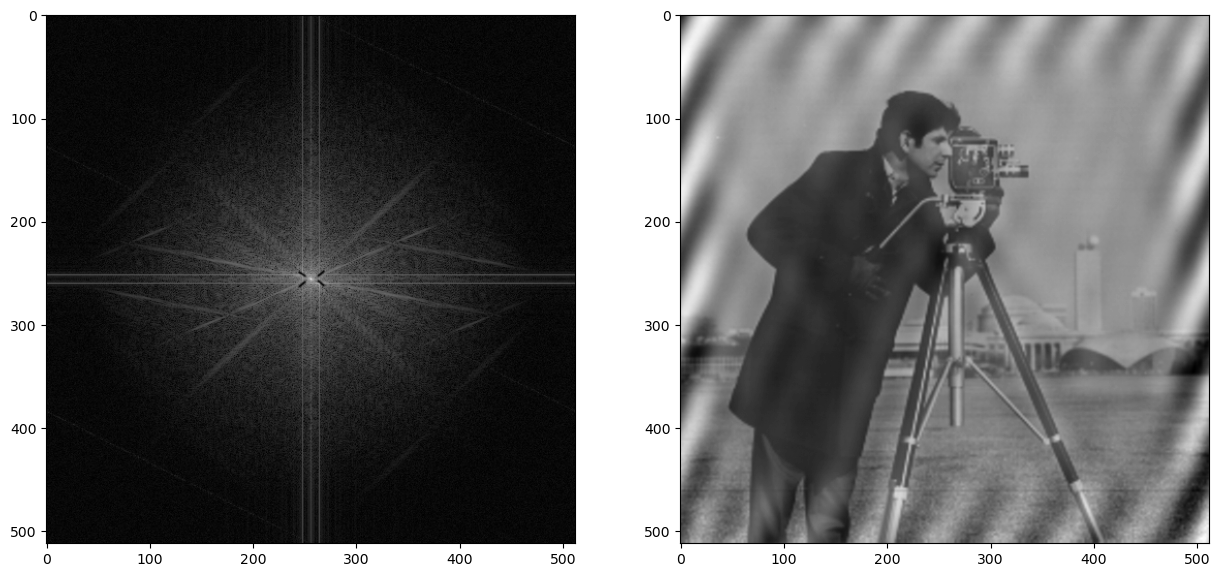

In [98]:
fft2_center_mag2=np.exp(log_center_mag2/20)-1 # Calculamos el exponencial
fft2_new2 = fft2_center_mag2*np.exp(1j*fft2_center_ang)# A+jB =Magnitud(A,B)*exp(J*theta(A,B))
fft2_new2 = np.fft.ifftshift(fft2_new2) #Volver a descentralizar el array corregido
#Aplicar transformada inversa
img_new2 = np.fft.ifft2(fft2_new2)
#De la inversa solo se adquiere el modulo
img_new2 = np.abs(img_new2)
# Graficando los resultados aplicados
_, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].imshow(log_center_mag2,'gray') #Imagen corregida a mano
axes[1].imshow(img_new2,'gray')

## Aplicando Correccion matricial sobre imagenes
En la matriz de magnitud se copia a otra matriz el cual se va trabajar

Se busca el valor maximo de magnitud

In [99]:
mFila,mCol = int(filas/2) , int(columnas/2)
Aux=np.zeros((2,2)) # Matriz vacia qeu contendra los valores maximos

### Buscando matriz 2x2 lado izquierdo

In [100]:
#Encontrar maximos desde origen  de la columna hasta la mitda (Lado izquierdo)
Limit_izquierdo=mCol-5
fil_max,col_max=np.where(fft2_center_mag2[:,0:Limit_izquierdo] == np.amax(fft2_center_mag2[:,0:Limit_izquierdo]))
print('fil_max',fil_max)
print('col_max',col_max)
Aux[0,0]=fft2_center_mag2[fil_max,col_max]
Aux[0,1]=fft2_center_mag2[fil_max,col_max+1]
Aux[1,0]=fft2_center_mag2[fil_max+1,col_max]
Aux[1,1]=fft2_center_mag2[fil_max+1,col_max+1]
print('Matriz 2x2 Izqierda',Aux)

fil_max [252]
col_max [244]
Matriz 2x2 Izqierda [[3459.55756146 2832.32156423]
 [ 697.78631885  697.78631885]]


La matriz 2x2 , se porcede a calcular su matriz raiz y se reemplaza

In [101]:
fft2_center_mag2[fil_max,col_max]=215.62206529
fft2_center_mag2[fil_max,col_max+1]=27.99837592
fft2_center_mag2[fil_max+1,col_max]=14.55859728 
fft2_center_mag2[fil_max+1,col_max+1]=9.30983406

### Buscando matriz 2x2 lado derecho

In [102]:
fft2_center_mag2=np.copy(fft2_center_mag)
Limit_derecho=mCol+5
#Encontrar maximos de la mitad de la columna adelante 
fil_max,col_max=np.where(fft2_center_mag2[:,Limit_derecho:2*mCol-20] == np.amax(fft2_center_mag2[:,Limit_derecho:2*mCol-20]))
print('fil_max',fil_max)
print('col_max',col_max)
Aux[0,0]=fft2_center_mag2[fil_max,Limit_derecho+col_max]
Aux[0,1]=fft2_center_mag2[fil_max,Limit_derecho+col_max+1]
Aux[1,0]=fft2_center_mag2[fil_max+1,Limit_derecho+col_max]
Aux[1,1]=fft2_center_mag2[fil_max+1,Limit_derecho+col_max+1]
print('Matriz 2x2 Dercha',Aux)

fil_max [260]
col_max [3]
Matriz 2x2 Dercha [[46900.49212127  8240.79165384]
 [ 3734.5068355    739.72366588]]


La matriz 2x2 , se procede a calcular su matriz raiz y se reemplaza

In [103]:
fft2_center_mag2[fil_max,Limit_derecho+col_max]=215.18378389
fft2_center_mag2[fil_max,Limit_derecho+col_max+1]=36.27839297
fft2_center_mag2[fil_max+1,Limit_derecho+col_max]=16.44039944
fft2_center_mag2[fil_max+1,Limit_derecho+col_max+1]=11.97048012

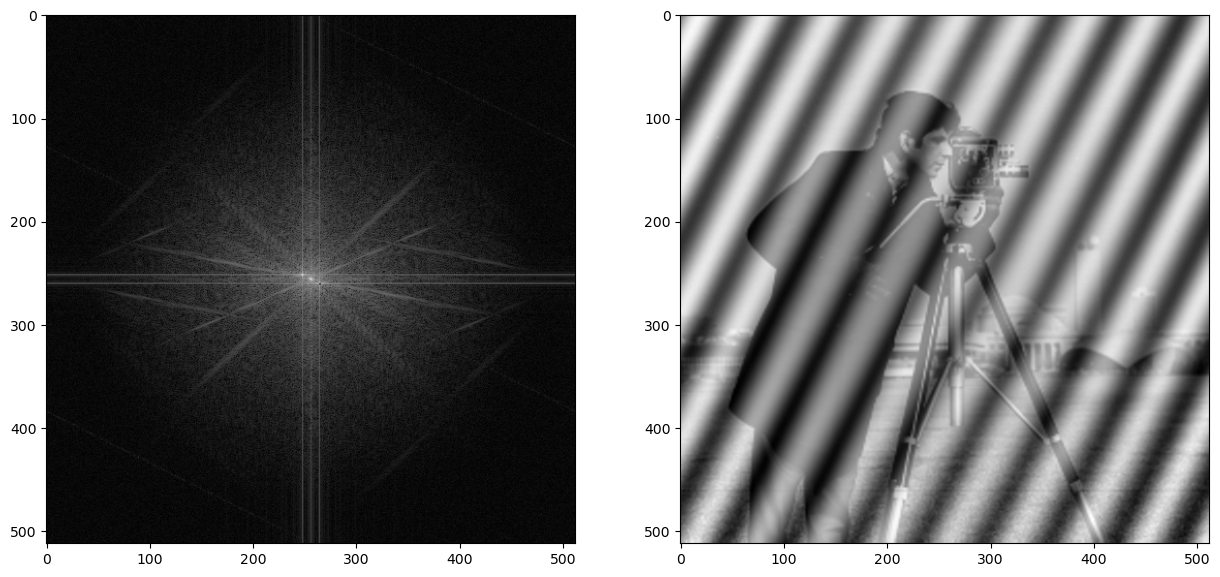

In [104]:
####### Escala logaritmica a lo corregido para visualizar
log_center_mag2 = 20*np.log(fft2_center_mag2+1)

#fft2_center_mag2=np.exp(log_center_mag2/20)-1 # Calculamos el exponencial
fft2_new2 = fft2_center_mag2*np.exp(1j*fft2_center_ang)# A+jB =Magnitud(A,B)*exp(J*theta(A,B))
fft2_new2 = np.fft.ifftshift(fft2_new2) #Volver a descentralizar el array corregido
#Aplicar transformada inversa
img_new2 = np.fft.ifft2(fft2_new2)
#De la inversa solo se adquiere el modulo
img_new2 = np.abs(img_new2)
# Graficando los resultados aplicados
_, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].imshow(log_center_mag2,'gray') #Imagen corregida a mano
axes[1].imshow(img_new2,'gray')

Verificacion de imagenes con una sola iteraccion a izquierda y una sola a derecha


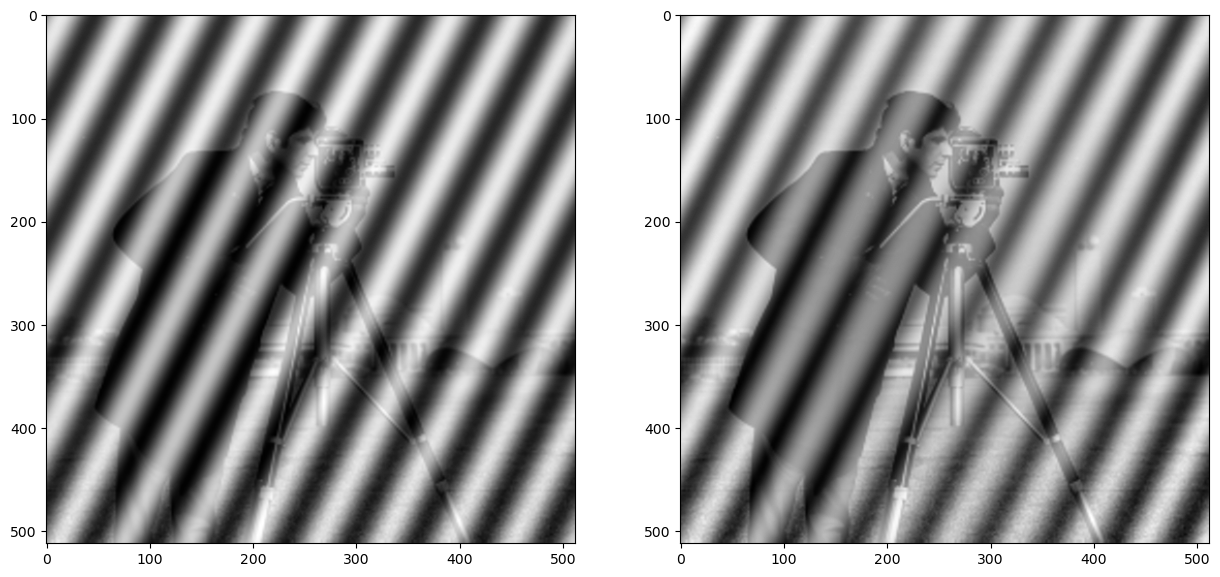

In [105]:
_, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].imshow(Img_gray,'gray') #Imagen original
axes[1].imshow(img_new2,'gray') #Imagen APLICADA CON RAICES DE MATRIES

### Buscando matriz 2x2 lado izquierdo ,segunda Iteraccion

In [106]:
#Encontrar maximos desde origen  de la columna hasta la mitda (Lado izquierdo)
Limit_izquierdo=mCol-5
fil_max,col_max=np.where(fft2_center_mag2[:,0:Limit_izquierdo] == np.amax(fft2_center_mag2[:,0:Limit_izquierdo]))
print('fil_max',fil_max)
print('col_max',col_max)
Aux[0,0]=fft2_center_mag2[fil_max,col_max]
Aux[0,1]=fft2_center_mag2[fil_max,col_max+1]
Aux[1,0]=fft2_center_mag2[fil_max+1,col_max]
Aux[1,1]=fft2_center_mag2[fil_max+1,col_max+1]
print('Matriz 2x2 Izqierda',Aux)

fil_max [252]
col_max [248]
Matriz 2x2 Izqierda [[46900.49212127  6297.72787476]
 [ 3274.69293805   494.29008976]]


Raiz_A:  [[215.62206529  27.99837592]
 [ 14.55859728   9.30983406]]
    

In [107]:
fft2_center_mag2[fil_max,col_max]=215.62206529
fft2_center_mag2[fil_max,col_max+1]=27.99837592
fft2_center_mag2[fil_max+1,col_max]=14.55859728 
fft2_center_mag2[fil_max+1,col_max+1]=9.30983406

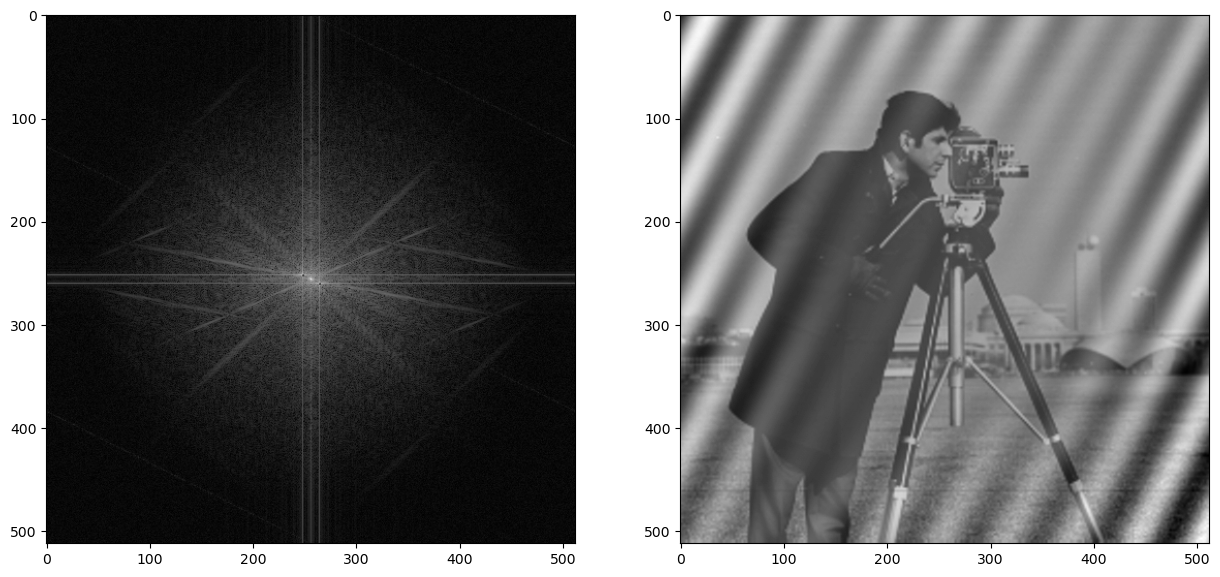

In [108]:
####### Escala logaritmica a lo corregido para visualizar
log_center_mag2 = 20*np.log(fft2_center_mag2+1)

#fft2_center_mag2=np.exp(log_center_mag2/20)-1 # Calculamos el exponencial
fft2_new2 = fft2_center_mag2*np.exp(1j*fft2_center_ang)# A+jB =Magnitud(A,B)*exp(J*theta(A,B))
fft2_new2 = np.fft.ifftshift(fft2_new2) #Volver a descentralizar el array corregido
#Aplicar transformada inversa
img_new2 = np.fft.ifft2(fft2_new2)
#De la inversa solo se adquiere el modulo
img_new2 = np.abs(img_new2)
# Graficando los resultados aplicados
_, axes = plt.subplots(1, 2, figsize=(15,12))
axes[0].imshow(log_center_mag2,'gray') #Imagen corregida a mano
axes[1].imshow(img_new2,'gray')